In [77]:
questions = {"1":"I expect to live about the same time.", "2":"I expect to die sooner.","3":"I expect to live longer."}


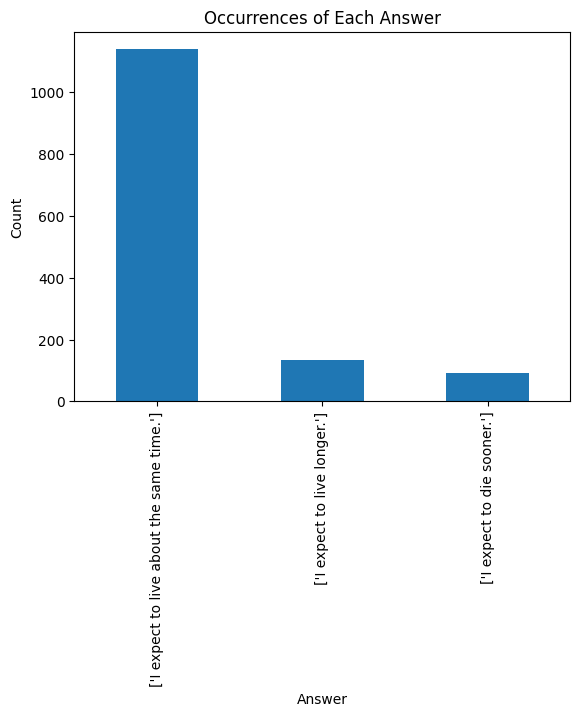

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/rgarzon/Documents/Stanford/genagents/populations/population_4373_age_50_51_52_53_54_55_56_57_58_59_60_61_62_63_64_65_66_67_68_69_70_71_72_73_74_75/answers.csv')

# Replace numerical values with textual descriptions in the 'choice' column
# Replace the column values based on the dictionary

def convert_string_to_number(s):
    return s.strip("'[]'")

#df['choice'] = df['choice'].apply(convert_string_to_number)
#df['choice'] = df['choice'].map(questions)
# Count the occurrences of each value in the 'answer' column
value_counts = df['choice'].value_counts()

# Plot the occurrences
value_counts.plot(kind='bar')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Occurrences of Each Answer')
plt.show()

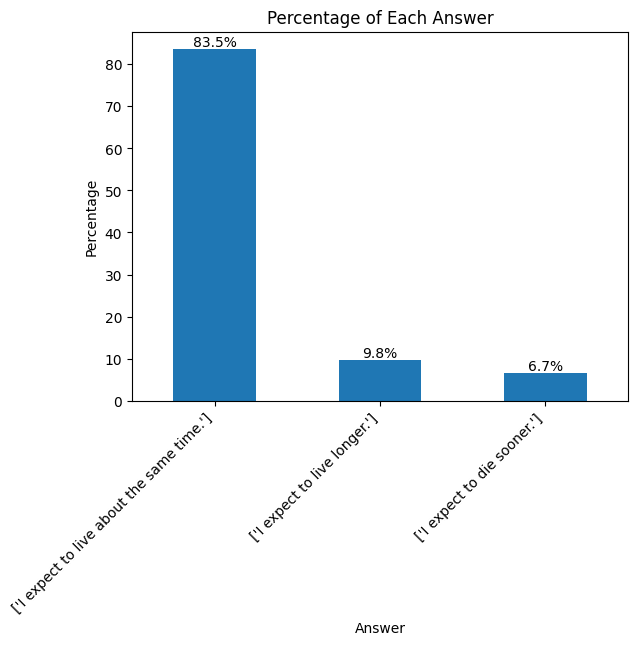

In [95]:
# Calculate the percentage of each class
value_counts_percentage = (value_counts / value_counts.sum()) * 100

# Plot the occurrences as a bar chart with horizontal labels
ax = value_counts_percentage.plot(kind='bar')
plt.xlabel('Answer')
plt.ylabel('Percentage')
plt.title('Percentage of Each Answer')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Add numerical values on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%')

plt.show()

In [ ]:
import numpy as np

# Translate log probabilities to probabilities
df['probabilities'] = np.exp(df['logprobs'])

# Print the updated dataframe
print(df[['choice', 'logprobs', 'probabilities']])

In [ ]:
# Group by 'choice' and sum the probabilities
choice_prob_sum = df.groupby('choice')['probabilities'].sum()

# Find the choice with the highest sum of probabilities
majority_choice = choice_prob_sum.idxmax()

print(f"The majority value of choice based on the sum of total probabilities is: {majority_choice}")

In [ ]:
# Group by 'choice' and calculate statistics for the 'logprobs' column
choice_stats = df.groupby('choice')['probabilities'].describe()

# Print the statistics
print(choice_stats)

In [ ]:
# Load the CSV file with only the required columns
df = pd.read_csv('/Users/rgarzon/Documents/Stanford/genagents/populations/repeat_20_times/answers.csv', usecols=['choice', 'logprobs'])

# Group by 'choice' and get the corresponding 'logprobs'
grouped = df.groupby('choice')['logprobs'].apply(list)

print(grouped)
# Group the data by 'choice' and get the corresponding 'logprobs'
grouped = df.groupby('choice')['logprobs'].apply(list)

# Create a boxplot to visualize the distribution of 'logprobs' for each 'choice'
plt.figure(figsize=(10, 6))
plt.boxplot(grouped, labels=grouped.index)
plt.xlabel('Choice')
plt.ylabel('Logprobs')
plt.title('Distribution of Logprobs for Each Choice')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/rgarzon/Documents/Stanford/genagents/populations/repeat_20_times/answers.csv')

# Count the occurrences of each value in the 'answer' column
value_counts = df['logprobs']

# Plot the occurrences
value_counts.plot(kind='bar')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Occurrences of Each Answer')
plt.show()